<a href="https://colab.research.google.com/github/Davioliveira1305/Metodos-Numericos-2/blob/main/Tarefa1_2_MN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1.2 de Metodos Numéricos 2

In [70]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import numba, warnings
%matplotlib inline

np.set_printoptions(threshold=10)

In [71]:
# Caminho do Arquivo que se encontra no meu drive
path_to_img = "/content/drive/MyDrive/IMAGENS/mickey.png"
# Leitura da imagem e conversão para a escala de cinza
img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)

A matriz relacionada a imagem tem dimensões de 245 x 220


array([[ 94, 100, 102, ...,  87,  64,  37],
       [ 96, 104, 106, ...,  87,  64,  36],
       [100, 110, 111, ...,  90,  67,  40],
       ...,
       [ 96, 102, 105, ..., 101,  97,  89],
       [ 94,  98, 102, ..., 101,  96,  89],
       [ 90,  99, 100, ..., 100,  95,  91]], dtype=uint8)
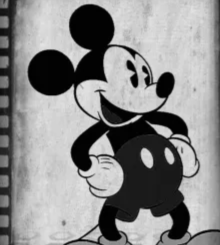

In [72]:
print(f'A matriz relacionada a imagem tem dimensões de {img.shape[0]} x {img.shape[1]}')
img

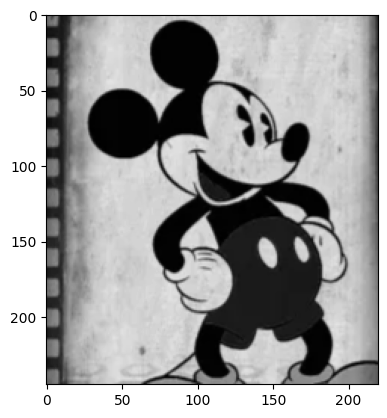

In [73]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Temos que inserir uma borda de zeros no eixo x e no eixo y da matriz para a passagem do filtro.

In [74]:
img = np.insert(img, 0, 0, axis=1)
img = np.insert(img, img.shape[1], 0, axis=1)
img = np.insert(img, 0, 0, axis=0)
img = np.insert(img, img.shape[0], 0, axis=0)

In [75]:
print(f'Nova dimensão da matriz: {img.shape[0]} x {img.shape[1]}')
print(img)

Nova dimensão da matriz: 247 x 222
[[  0   0   0 ...   0   0   0]
 [  0  94 100 ...  64  37   0]
 [  0  96 104 ...  64  36   0]
 ...
 [  0  94  98 ...  96  89   0]
 [  0  90  99 ...  95  91   0]
 [  0   0   0 ...   0   0   0]]


## Suavização da imagem utilizando o filtro Gaussiano

In [76]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_gaussiano(img):
  # Matriz para aplicar o filtro gaussiano
  gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
  gaussian = gaussian.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem = np.zeros((img.shape[0]-2, img.shape[1]))
  for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
    for j in range(0, img.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem[i-1][j-1] = round(np.sum(np.multiply(gaussian, piece_img.flatten()))/16)
  return nova_imagem


In [77]:
img_gauss = filtro_gaussiano(img)

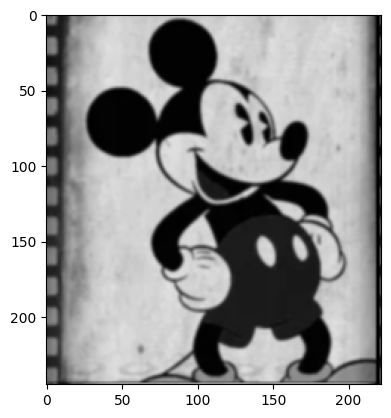

In [78]:
plt.imshow(img_gauss, cmap='gray', vmin=0, vmax=255)

## Filtro Convulacional de Gradiente

### Filtro de Sobel na direção x

In [79]:




sobel_y = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)

sobel_y = sobel_y.flatten()

img_sobel_y = np.zeros((img.shape[0] - 2, img.shape[1] - 2))

In [80]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_sobel_x(img):
  # Matriz para aplicar o filtro de Sobel na direção x
  sobel_x = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
  )
  sobel_x = sobel_x.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem_x = np.ndarray(shape=(img.shape[0]-2, img.shape[1] - 2), dtype=int)
  nova_imagem_x.fill(0)
  for i in range(0, nova_imagem_x.shape[0]-2):
    for j in range(0, nova_imagem_x.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem_x[i-1][j-1] = round(np.sum(np.multiply(sobel_x, piece_img.flatten())))
  return nova_imagem_x

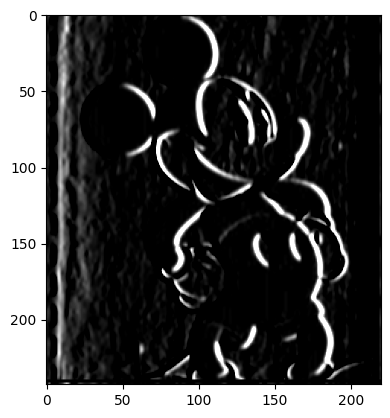

In [81]:
# Imagem gerada pelo filtro de sobel na direção x
img_sobel_dirx = filtro_sobel_x(img_gauss)
plt.imshow(img_sobel_dirx, cmap='gray', vmin=0, vmax=255)

### Filtro de sobel na direção y

In [82]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_sobel_y(img):
  # Matriz para aplicar o filtro de Sobel na direção y
  sobel_y = np.array(
    [[-1, 2, -1],
     [0, 0, 0],
     [1, 2, 1]]
  )
  sobel_y = sobel_y.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem_y = np.ndarray(shape=(img.shape[0]-2, img.shape[1] - 2), dtype=int)
  nova_imagem_y.fill(0)
  for i in range(0, nova_imagem_y.shape[0]-2):
    for j in range(0, nova_imagem_y.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem_y[i-1][j-1] = round(np.sum(np.multiply(sobel_y, piece_img.flatten())))
  return nova_imagem_y

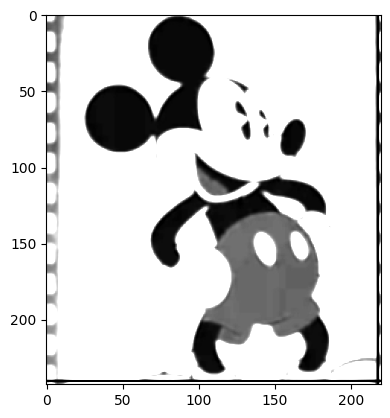

In [83]:
# Imagem gerada pelo filtro de sobel na direção y
img_sobel_diry = filtro_sobel_y(img_gauss)
plt.imshow(img_sobel_diry, cmap='gray', vmin=0, vmax=255)

### Tópico 2.3. em cada uma das matrizes, A e B, eleve ao quadrado os valores dos elementos;


In [84]:
# Cada elemento da matriz será elevado ao quadrado
img_sobel_dirx = img_sobel_dirx ** 2
# Cada elemento da Matriz será elevado ao quadrado
img_sobel_diry = img_sobel_diry ** 2
# Somando as duas matrizes
img_sobel_final = np.add(img_sobel_dirx, img_sobel_diry)
# Tirando a raiz quadrada de cada elemento da matriz
img_sobel_final = np.sqrt(img_sobel_final)
img_sobel_final.astype(int)

array([[426, 447, 498, ...,   0,   0, 444],
       [452, 471, 501, ...,   0,   0, 451],
       [446, 462, 480, ...,   0,   0, 438],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [395, 401, 473, ...,   0,   0, 431]])

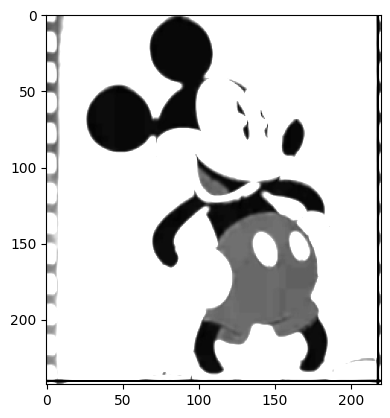

In [85]:
plt.imshow(img_sobel_final, cmap='gray', vmin=0, vmax=255)